# Project: InstaBot - 2

## Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from time import sleep
from bs4 import BeautifulSoup
import requests
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
driver = webdriver.Chrome()
driver.get('https://www.instagram.com/')
#driver.maximize_window()

In [3]:
#login
wait = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'f0n8F ')))
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')
username.send_keys('USERNAME')
password.send_keys('PASSWORD')
password.submit()

C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2574680492.py:3: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  username = driver.find_element_by_name('username')
C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2574680492.py:4: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  password = driver.find_element_by_name('password')


In [5]:
#click on save info
save_info = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"L3NKy")))
save_info.click()

In [6]:
#click on notification (Not Now)
notification = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
notification.click()

In [7]:
##search_open_profile() function is same as part-I. All the functionality is same as before.
def search_open_profile(s):
    try:
        driver.refresh()
        #locatong search box bar and sending text 
        wait = WebDriverWait(driver, 10)
        search_box = wait.until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class, "_aawh")]')))

        #clear search box
        search_box.clear()
        search_box.send_keys(s)
    
        #locating serched result
        pro = wait.until(EC.element_to_be_clickable((By.XPATH, '//a[contains(@class,"oajrlxb2")]//div[contains(@class,"_aacl")]/div/div')))
        pro.click()
        
    except TimeoutException :
        print('No Search Found!')

## Problem 1 : Analyse The Habits of Bloggers

### [1.1] From the list of obtained instagram handles, when I searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers.

In [8]:
#search food
search_box=driver.find_element_by_xpath('//input[@placeholder = "Search"]')
search_box.send_keys('food')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class= "_aacl _aaco _aacw _aacx _aad6"]')))

#append 10 foodhandles in the list
foodhandles = []
count=0
for i in driver.find_elements_by_xpath('//div[@class= "_aacl _aaco _aacw _aacx _aad6"]'):
    if count==10:
        break
    foodhandles.append(i.text)
    count+=1
        
close = driver.find_element_by_xpath('//div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/nav/div[2]/div/div/div[2]/div[2]')
close.click()
sleep(2)

# append the followers in dictionary
dic={}
base_url = 'https://www.instagram.com/'


for i in range(len(foodhandles)):
    # we will use this method for every foodhandle
    curr_url = base_url + foodhandles[i]
    driver.get(curr_url)
    sleep(5)
    
    #find number of followers & add them in dictionary
    followers = driver.find_element_by_xpath('//div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/main/div/header/section/ul/li[2]/a/div/span')
    f = followers.get_attribute('title')
    fn = int("".join(f.split(',')))
    dic[foodhandles[i]] = fn
    
    
#sort dictionary in reverse order   
sorted_dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=True))
count=0
#print top 5 foodhandles along with their followers
for i in sorted_dic:
    if count==5:
        break
    print(i, sorted_dic[i]) 
    count+=1


C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2560847043.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box=driver.find_element_by_xpath('//input[@placeholder = "Search"]')
C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2560847043.py:9: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  for i in driver.find_elements_by_xpath('//div[@class= "_aacl _aaco _aacw _aacx _aad6"]'):
C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2560847043.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  close = driver.find_element_by_xpath('//div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/nav/div[2]/div/div/div[2]/div[2]')
C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2560847043.py:31: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=

yourfoodlab 1986500
foodie_incarnate 1357453
food 180892
foodzpah 132472
foodranchi 121676


### [1.2] Now Find the number of posts out of these handles have done in the previous 3 days

In [9]:
#create dictionary for post past three days
post_three_days = {}   
count = 0
#create list for top5 food handles
foodhandles_top5 = []     

#adding top5 food handles in list
for i in sorted_dic:
    if count==5:
        break
    foodhandles_top5.append(i)
    count+=1
    

base_url = 'https://www.instagram.com/'

for i in range(len(foodhandles_top5)):
    
    no_of_posts = 0
    
    #for per food handle page
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(3)
    
    #for all posts in that food handle
    posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        sleep(3)
        j.click()
        sleep(3)
        
        #find date
        post_date =  driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div/div/a/div/time')
        date = post_date.get_attribute('title').split(' ')[1].split(',')[0]
        date_int = int(date)
        
        #check if date is before three days
        if date_int<16:
            break
        else:
            no_of_posts+=1 
            
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(2)
    
    post_three_days[foodhandles_top5[i]] = no_of_posts
    

print(post_three_days)        

C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2518801656.py:27: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2518801656.py:34: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  post_date =  driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div/div/a/div/time')


{'yourfoodlab': 2, 'foodie_incarnate': 1, 'food': 1, 'foodzpah': 0, 'foodranchi': 0}


### [1.3] Depict this information using a suitable graph.

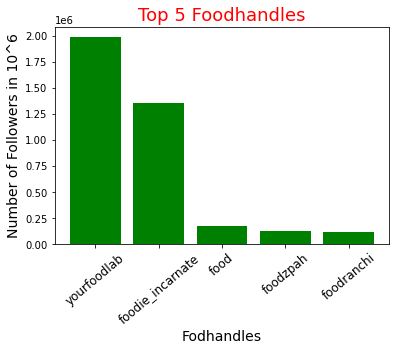

In [10]:
foodhandles_followers = []
foodhandles=[]
count=0
for i in sorted_dic:
    if count==5:
        break
    foodhandles_followers.append(sorted_dic[i])
    foodhandles.append(i)
    count+=1

plt.bar(foodhandles, foodhandles_followers, color='green')
plt.xlabel('Fodhandles', fontsize=14)
plt.ylabel('Number of Followers in 10^6', fontsize=14)
plt.xticks(rotation = 40, fontsize =12)
plt.title('Top 5 Foodhandles',fontsize = 18, color='Red')
plt.show()

## Problem 2 : Requirement of Hashtags For His Posts

### [2.1] Open the 5 handles that I obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [36]:
list_of_total_words = []
foodhandles_top5 = []
c=0
for i in sorted_dic:
    if c==5:
        break
    foodhandles_top5.append(i)
    c+=1

base_url = 'https://www.instagram.com/'
for i in range(len(foodhandles_top5)):
    #for per food handle page
    print(foodhandles_top5[i])
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(5)
    count=0
    #for all 10 posts in each top 5 food handle
    posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        if count==10:
            break
        print('Post - ',count+1)
        sleep(3)
        j.click()
        sleep(5)
        
        #find text of post & append all words in the list
        list_of_words=[]
        post_details = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
        for word in post_details.text.split(' '):
            list_of_words.append(word)
            list_of_total_words.append(word)
        sleep(5)
        count+=1
        print(list_of_words)
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(3)
#print(list_of_words)   


yourfoodlab


C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/1871411683.py:19: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')


Post -  1


C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/1871411683.py:30: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  post_details = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')


['I', 'am', 'at', '@Your', 'Food', 'Lab', 'kitchen', 'with', 'Sanjyot', 'Keer.', "He's", 'cooking', 'up', 'a', 'riot', 'for', 'me', 'and', 'what', 'I', 'am', 'most', 'excited', 'about', 'is', 'tasting', 'his', 'special', 'Kala', 'Mutton.', 'I', 'have', 'seen', 'him', 'cook', 'this', 'Black', 'mutton', 'on', 'his', 'channel,', 'and', 'I', "couldn't", 'keep', 'my', 'excitement', 'at', 'bay!\n\n#kalamutton', '#sanjotkheer', '#khaanemeinkyahai', '#kunalvijayakar', '#nonveg', '#muttonrecipes', '#recipes', '#reelsfood', '#reels']
Post -  2
['Are', 'you', 'craving', 'for', 'this', 'tempting', 'Chicken', 'Dum', 'Biryani', '🥰', 'My', 'dinner', 'scene', 'is', 'all', 'set', 'and', 'what', 'about', 'yours?\nFull', 'video', 'is', 'now', 'up', 'on', 'our', 'YouTube', 'Channel!', 'Cheers', '🥂\n.\n.\n.\n.\n#recipe', '#foodie', '#indiancuisine', '#streetfood', '#biryani', '#egglover', '#eggrecipes', '#eggetarian', '#sanjyotkeer', '#foodporn', '#sanjyotkeer']
Post -  3
['Chalo', 'aaj', 'kuch', 'chatpata

### [2.2] Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [37]:
#find frequency
freq = {}
for i in list_of_total_words:
    if i in freq:
        freq[i]+=1
    else:
        freq[i]=1
        
word_freq = []
for i in freq:
    word_freq.append([i, freq[i]])

print(word_freq)

[['I', 6], ['am', 2], ['at', 9], ['@Your', 1], ['Food', 1], ['Lab', 1], ['kitchen', 1], ['with', 26], ['Sanjyot', 2], ['Keer.', 1], ["He's", 1], ['cooking', 2], ['up', 6], ['a', 47], ['riot', 1], ['for', 28], ['me', 5], ['and', 47], ['what', 2], ['most', 3], ['excited', 1], ['about', 6], ['is', 25], ['tasting', 1], ['his', 6], ['special', 1], ['Kala', 1], ['Mutton.', 1], ['have', 7], ['seen', 2], ['him', 1], ['cook', 6], ['this', 19], ['Black', 1], ['mutton', 1], ['on', 18], ['channel,', 1], ["couldn't", 1], ['keep', 1], ['my', 11], ['excitement', 1], ['bay!\n\n#kalamutton', 1], ['#sanjotkheer', 1], ['#khaanemeinkyahai', 1], ['#kunalvijayakar', 1], ['#nonveg', 2], ['#muttonrecipes', 2], ['#recipes', 1], ['#reelsfood', 1], ['#reels', 7], ['Are', 1], ['you', 17], ['craving', 1], ['tempting', 1], ['Chicken', 3], ['Dum', 1], ['Biryani', 1], ['🥰', 1], ['My', 1], ['dinner', 1], ['scene', 1], ['all', 5], ['set', 4], ['yours?\nFull', 1], ['video', 10], ['now', 6], ['our', 9], ['YouTube', 7], [

### [2.3] Create a csv file with two columns : the word and its frequency

In [39]:
#create pandas dataframe
df = pd.DataFrame(word_freq, columns=['Words', 'Frequency'])
df

,Words,Frequency
0,I,6
1,am,2
2,at,9
3,@Your,1
4,Food,1
...,...,...
1478,KALAKAND.,1
1479,😍👍🏻\n#delhi,1
1480,#sweets,1
1481,Yaay,1


In [40]:
#create csv file
df.to_csv('Words_Freq', index = False) 

### [2.4] Now, find the hashtags that were most popular among these bloggers.

In [41]:
#popular hashtags
df = df[df['Words'].str.startswith('#')]
popular_hashtags = df.sort_values('Frequency', ascending = False)[0:10]
print(popular_hashtags)

              Words  Frequency
1189          #food         11
73      #streetfood         10
101     #indianfood         10
79        #foodporn         10
78     #sanjyotkeer          7
49           #reels          7
1145  #feelitreelit          7
506        #explore          7
414    #foodblogger          6
71          #foodie          6


### [2.5] Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

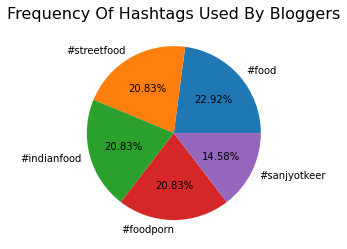

In [42]:
top5_hashtags = popular_hashtags.Words[0:5]
top5_hashtags_freq = popular_hashtags.Frequency[0:5]

#plot pie chart
plt.title("Frequency Of Hashtags Used By Bloggers", fontsize=16, color='Black')
plt.pie(top5_hashtags_freq, labels = top5_hashtags, autopct = "%.2f%%" )
plt.show()

## Problem 3 : Calculation of Average (Followers vs Likes) Ratio

### [3.1] Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [21]:
# for this question I am unable to find likes of handle "food" as number of likes & views weren't displayed. 
#I have caluculated likes of other handles
# I have attached image in folder regarding the same.

foodhandles_top5 = []
co=0
for i in sorted_dic:
    if co==5:
        break
    foodhandles_top5.append(i)
    co+=1
    
handles_likes = {}
base_url = 'https://www.instagram.com/'
for i in range(len(foodhandles_top5)):
    #for per food handle page
    if i==2:                   #skipped the handle "food"
        continue
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(5)
    count=0
    total_likes = 0
    
    #for all posts in that food handle
    posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        if count==10:
            break
        sleep(3)
        j.click()
        sleep(3)
        
        try:
            post_details = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
            like = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div')
            number_of_likes = int(''.join(like.text.split(' ')[0].split(',')))
            total_likes = total_likes + number_of_likes
    
        #if number of likes aern't displayed then I have calculated number of views
        except NoSuchElementException:
            views = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/span/div')
            number_of_views = int(''.join(views.text.split(' ')[0].split(',')))
            total_likes = total_likes + number_of_views
            
        count+=1
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(3)
        
    handles_likes[foodhandles_top5[i]] = total_likes
    
print(handles_likes)

C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2600289610.py:26: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2600289610.py:35: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  post_details = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
C:\Users\abhis\AppData\Local\Temp/ipykernel_10008/2600289610.py:36: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  like = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/d

{'yourfoodlab': 2297216, 'foodie_incarnate': 866751, 'foodzpah': 30028, 'foodranchi': 32419}


### [3.2] Calculate the average likes for a handle.

yourfoodlab 229721.6
foodie_incarnate 86675.1
foodzpah 3002.8
foodranchi 3241.9


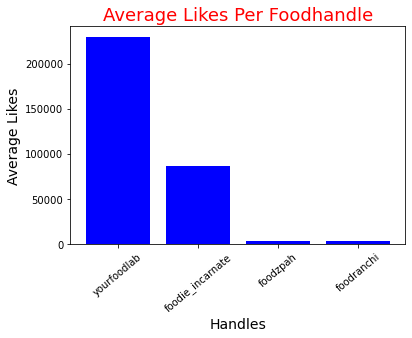

In [29]:
#create graphs of avg likes per foodhandles
avg_likes = []
for i in likes:
    avg_likes.append(i/10)

for i in range(len(handles)):
    print(handles[i], avg_likes[i])
    
plt.bar(handles, avg_likes,color='Blue')
plt.xlabel('Handles',fontsize=14)
plt.xticks(rotation = 40)
plt.ylabel('Average Likes',fontsize=14)
plt.title('Average Likes Per Foodhandle',fontsize=18,color='Red')
plt.show()

yourfoodlab 229721.6
foodie_incarnate 86675.1
foodzpah 3002.8
foodranchi 3241.9


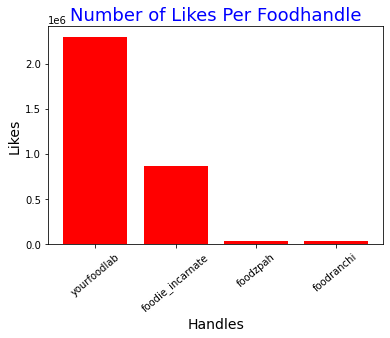

In [28]:
#create graphs of number of likes per foodhandles
handles = []
likes = []
for i in handles_likes:
    handles.append(i)
    likes.append(handles_likes[i])

for i in range(len(handles)):
    print(handles[i], avg_likes[i])    
    
plt.bar(handles, likes,color='Red')
plt.xlabel('Handles',fontsize=14)
plt.xticks(rotation = 40)
plt.ylabel('Likes',fontsize=14)
plt.title('Number of Likes Per Foodhandle', fontsize=18,color='Blue')
plt.show()

### [3.3] Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [25]:
#calculate ratio & create graph as per food handle
followers = []
for i in range(len(foodhandles_followers)):
    if i==3:
        continue
    followers.append(foodhandles_followers[i])

ratio = []
for i in range(len(followers)):
    ratio.append(followers[i]/avg_likes[i])
    
for i in range(len(followers)):
    print(handles[i], ratio[i])

yourfoodlab 8.647423664122137
foodie_incarnate 15.661395256538498
foodzpah 60.241108298921006
foodranchi 37.53231129892964


### [3.4] Create a bar graph to depict the above obtained information.

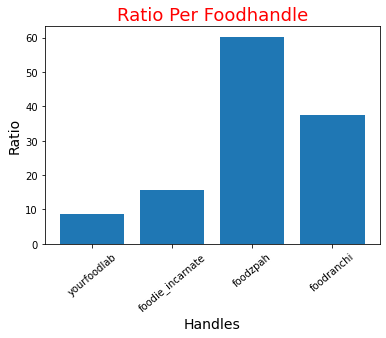

In [27]:
plt.bar(handles, ratio)
plt.xlabel('Handles', fontsize=14)
plt.xticks(rotation = 40)
plt.ylabel('Ratio',fontsize=14)
plt.title('Ratio Per Foodhandle',fontsize=18,color='Red')
plt.show()

## Conclusion

- Developed Python-based automated Instagram bot made for shifting through profiles to extract the relevant information.
- Features of the bot allow prioritisation of profiles based on followers and analyse the frequency of each word in hashtags.
- Identified top 10 posts of the top 5 handles; plotted each handle with the ratio of average likes and followers.